In [18]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100

In [19]:
file_path = Path("../data/raw/recipes_filtered.csv")
df = pd.read_csv(file_path)

In [20]:
df['Country']=''
keyword_categories = pd.read_csv(Path("../data/raw/keywords.csv"))
for country in tqdm(keyword_categories['Country'].dropna().str.lower()):
    for j in range(0,len(df)):
        try:
            if df.loc[j,'Keywords'].lower().find(country)!=-1:
                df.loc[j,'Country']=country
        except:
            continue


  0%|          | 0/77 [00:00<?, ?it/s]

In [21]:
df_combined_country=df[['AggregatedRating', 'Country']]
df_combined_country.drop(index=df_combined_country[df_combined_country['Country']=='nan'].index,inplace=True)
df_combined_country.dropna(inplace=True)
df_combined_country
# df_combined_country.to_csv('del100.csv')

,AggregatedRating,Country
0,3.0,indian
1,4.5,
2,4.5,
3,4.5,
4,5.0,
...,...,...
123608,5.0,
123609,5.0,
123610,5.0,
123611,5.0,


In [22]:
country_count=df_combined_country['Country'].value_counts()<200
for country in country_count.index:
    if country_count[country]:
        df_combined_country.drop(df_combined_country[df_combined_country['Country']==country].index,inplace=True)
df_combined_country['Country'].value_counts()

Country
                                90105
european                         8452
mexican                          3015
asian                            2506
canadian                         2076
australian                       1357
indian                           1327
greek                            1243
southwestern u.s.                1054
chinese                           929
southwest asia (middle east)      878
tex mex                           795
african                           746
caribbean                         699
south american                    658
german                            629
spanish                           629
thai                              611
scandinavian                      512
moroccan                          506
cajun                             475
creole                            398
japanese                          383
new zealand                       322
scottish                          258
swiss                             222
Name

In [23]:
Country_ranking=pd.DataFrame(df_combined_country.groupby('Country').mean()['AggregatedRating'].sort_values(ascending=False))
Country_ranking.drop(index='',inplace=True)

In [24]:
# df_combined_country['Country'].value_counts()
from numpy import random
import matplotlib.pyplot as plt
boxes=[]
labels=[]
for country in Country_ranking.index:
    boxes.append(df_combined_country[df_combined_country['Country']==country]['AggregatedRating'])
    labels.append(country)

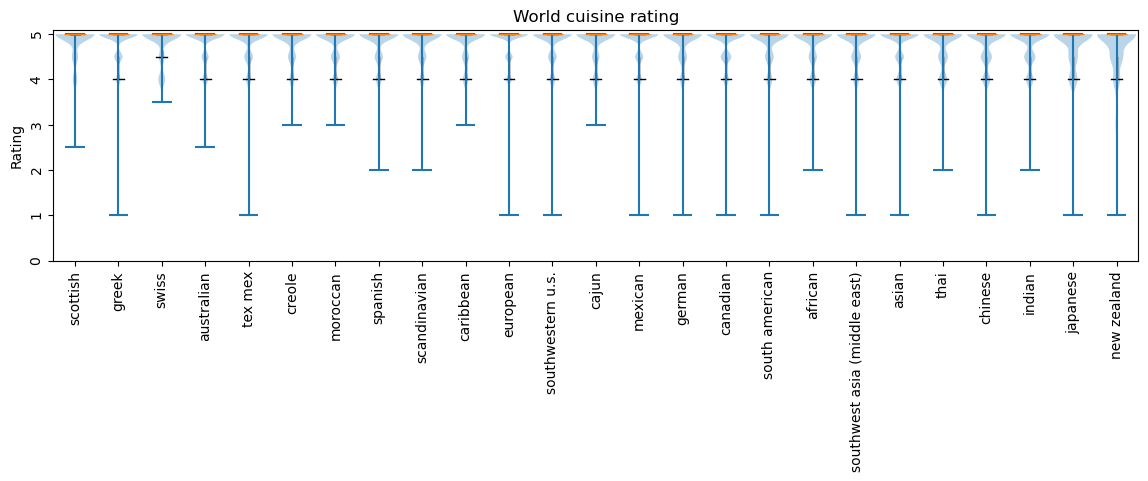

In [25]:
import seaborn as sns
plt.figure(figsize=(14,3))
plt.boxplot(boxes,labels=labels, showbox=False, flierprops={'marker': 'o', 'markersize': 0, 'markeredgecolor': 'red'} )
plt.violinplot(boxes, widths=.9)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel('Rating')
plt.title('World cuisine rating')
plt.ylim(0,5.1)
plt.savefig('World cuisine rating.png', bbox_inches='tight', transparent=True)
plt.show()

In [26]:
Country_ranking.to_csv('../data/results/Country_ranking.csv')